In [1]:
from dataclasses import dataclass
from fnpcell import all as fp
from gpdk import all as pdk
from gpdk.technology import get_technology 

FnPCell version: 1.5.1rc1
GPDK version: 1.2.24


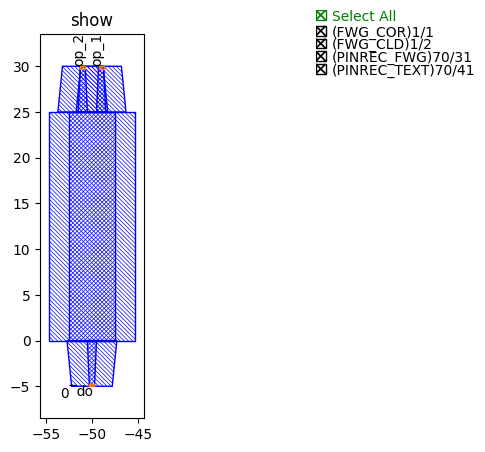

Mmi1x2(name='Mmi1x2', bands=None, patches=(), port_names=(), transform=Affine2D.new(scaling=(1.0, 1.0), rotation=1.5707963267948966, translation=(-50, 0)), _pcell_elapsed_time_=0.008109599999999162, mid_wav_core_width=5, wav_core_width=1, n_inputs=1, n_outputs=2, length=25, transition_length=5, trace_spacing=2, waveguide_type=WG.FWG.C._T_WIRE(core_layout_width=0.55, cladding_layout_width=4.45, core_design_width=0.45, cladding_design_width=4.45, port_names=('op_0', 'op_1')))

In [2]:
insts, elems, ports = fp.InstanceSet(), fp.ElementSet(), fp.PortSet()
TECH = get_technology()
mmi = pdk.Mmi1x2()
m1 = mmi.rotated(degrees=90).translated(-50, 0)
insts += m1
m2 = mmi.rotated(degrees=90).translated(50, 0)
insts += m2
fp.plot(m1)
# links = fp.create_links(
#             link_type=TECH.WG.FWG.C.WIRE,
#             bend_factory=TECH.WG.FWG.C.EXPANDED.BEND_CIRCULAR,
#             specs=[
#                 fp.LinkBetween(
#                     m1["op_2"],
#                     m2["op_1"],
#                     target_length=200,
#                 ),
#                 fp.LinkBetween(
#                     m1["op_1"],
#                     m2["op_2"],
#                     target_length=150
#                 ),
#             ],
#         )
# insts += links



In [3]:
links = fp.create_links(
            link_type=TECH.WG.FWG.C.WIRE,
            bend_factory=TECH.WG.FWG.C.EXPANDED.BEND_CIRCULAR,
            specs=[
                fp.LinkBetween(
                    m1["op_2"],
                    m2["op_1"],
                    target_length=200,
                ),
                fp.LinkBetween(
                    m1["op_1"],
                    m2["op_2"],
                    target_length=150
                ),
            ],
        )
insts += links
ports += m1["op_0"].with_name("mzi_port1")
ports += m2["op_0"].with_name("mzi_port2")

device = fp.Device(content=[insts], ports=ports)
            

 

# device = fp.Library()










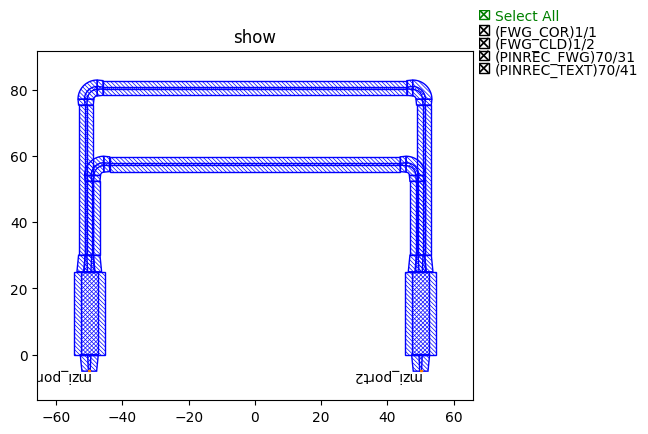

_ImmutableCellRef(assigned_cell=Cell(ports=(OwnedPort(name='mzi_port1', raw=OwnedPort(name='op_0', raw=OwnedPort(name='op_0', raw=Port(name='op_0', position=(-5, 0), orientation=3.141592653589793, waveguide_type=WG.FWG.C._T_WIRE(core_layout_width=0.55, cladding_layout_width=4.45, core_design_width=0.45, cladding_design_width=4.45, port_names=('op_0', 'op_1')), shape=Rect(width=0.3, height=0.55, corner_radii=(0, 0, 0, 0), transform=Affine2D.new(scaling=(1.0, 1.0), rotation=3.141592653589793, translation=(-4.85, 0.0))), hidden=False, disabled=False), assigned_orientation=None, hidden=False, disabled=False), assigned_orientation=None, hidden=False, disabled=False), assigned_orientation=None, hidden=False, disabled=False), OwnedPort(name='mzi_port2', raw=OwnedPort(name='op_0', raw=OwnedPort(name='op_0', raw=Port(name='op_0', position=(-5, 0), orientation=3.141592653589793, waveguide_type=WG.FWG.C._T_WIRE(core_layout_width=0.55, cladding_layout_width=4.45, core_design_width=0.45, cladding_d

In [4]:
fp.plot(device)

In [8]:
from pathlib import Path
import gpdk.components.all
components = gpdk.components.all
env = dict(wl_start=1.53, wl_end=1.565, points_num=351, T=300)
fp.export_spc(device, file="gpdk\\examples\\local\\simulation2.spc", components=components, sim_env=fp.sim.Env(**env))

export_spc: gpdk\examples\local\simulation2.spc


Cell(ports=(OwnedPort(name='mzi_port1', raw=OwnedPort(name='op_0', raw=OwnedPort(name='op_0', raw=Port(name='op_0', position=(-5, 0), orientation=3.141592653589793, waveguide_type=WG.FWG.C._T_WIRE(core_layout_width=0.55, cladding_layout_width=4.45, core_design_width=0.45, cladding_design_width=4.45, port_names=('op_0', 'op_1')), shape=Rect(width=0.3, height=0.55, corner_radii=(0, 0, 0, 0), transform=Affine2D.new(scaling=(1.0, 1.0), rotation=3.141592653589793, translation=(-4.85, 0.0))), hidden=False, disabled=False), assigned_orientation=None, hidden=False, disabled=False), assigned_orientation=None, hidden=False, disabled=False), assigned_orientation=None, hidden=False, disabled=False), OwnedPort(name='mzi_port2', raw=OwnedPort(name='op_0', raw=OwnedPort(name='op_0', raw=Port(name='op_0', position=(-5, 0), orientation=3.141592653589793, waveguide_type=WG.FWG.C._T_WIRE(core_layout_width=0.55, cladding_layout_width=4.45, core_design_width=0.45, cladding_design_width=4.45, port_names=('o

In [9]:
import sflow as sf
sim_result = sf.run_sim(
        input_ports=["mzi_port1"],  # Define the port which optical signal input
        output_ports=["mzi_port1", "mzi_port2"],  # Define the ports which optical signal output
        env=env,  # Define the environment
        netlist_file="C:\\photoCAD\\layout1002\\.venv_layout1002\\Lib\\site-packages\\gpdk\\examples\\local\\simulation2.spc",  # Define the netlist file"
        is_print_netlist=True  # Defines whether to print a simplified netlist information
    )


instances info:
Straight_7 <Straight>
TaperLinear_9 <TaperLinear>
BendCircular90_FWG_C_EXPANDED_5 <BendCircular90_FWG_C_EXPANDED>
TaperLinear_10 <TaperLinear>
Straight_8 <Straight>
TaperLinear_11 <TaperLinear>
BendCircular90_FWG_C_EXPANDED_6 <BendCircular90_FWG_C_EXPANDED>
TaperLinear_12 <TaperLinear>
Straight_9 <Straight>
Straight_4 <Straight>
TaperLinear_5 <TaperLinear>
BendCircular90_FWG_C_EXPANDED_3 <BendCircular90_FWG_C_EXPANDED>
TaperLinear_6 <TaperLinear>
Straight_5 <Straight>
TaperLinear_7 <TaperLinear>
BendCircular90_FWG_C_EXPANDED_4 <BendCircular90_FWG_C_EXPANDED>
TaperLinear_8 <TaperLinear>
Straight_6 <Straight>
Mmi1x2_1 <Mmi1x2>
Mmi1x2_2 <Mmi1x2>

links info:
Straight_7["op_1"]>>TaperLinear_9["op_0"]
TaperLinear_9["op_1"]>>BendCircular90_FWG_C_EXPANDED_5["op_0"]
BendCircular90_FWG_C_EXPANDED_5["op_1"]>>TaperLinear_10["op_0"]
TaperLinear_10["op_1"]>>Straight_8["op_0"]
Straight_8["op_1"]>>TaperLinear_11["op_0"]
TaperLinear_11["op_1"]>>BendCircular90_FWG_C_EXPANDED_6["op_0"]
